## **Assignment No -3**

---

**Name** - Vaishnavi Krishnat Phalle .
**Roll No** - EN23107096 .
**Class** - TY(B) .
**Batch** - A

---

**Title** -  Develop a sentiment analysis model to analyze customer reviews of products or services

In [ ]:
import pandas as pd

try:
    train = pd.read_csv('train.csv', engine='python', on_bad_lines='skip')
    print("Successfully loaded train.csv")
except Exception as e:
    print(f"Error loading train.csv: {e}")
    train = pd.DataFrame()

try:
    test = pd.read_csv('test.csv', engine='python', on_bad_lines='skip',encoding="ISO-8859-1")
    print("Successfully loaded test.csv")
except Exception as e:
    print(f"Error loading test.csv: {e}")
    test = pd.DataFrame()

if not train.empty and not test.empty:
    merged_data = pd.concat([train, test], ignore_index=True)
    merged_data.to_csv("customer_reviews.csv", index=False)
    print("Successfully merged train and test data into customer_reviews.csv")
elif train.empty and not test.empty:
    print("train.csv failed to load, so only test.csv was loaded.")
elif not train.empty and test.empty:
    print("test.csv failed to load, so only train.csv was loaded.")
else:
    print("Both train.csv and test.csv failed to load. No merged data created.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('customer_reviews.csv')
df.head()

,Id,Review,Rating
0,1,I have bought several of the Vitality canned d...,5
1,2,Product arrived labeled as Jumbo Salted Peanut...,1
2,3,This is a confection that has been around a fe...,4
3,4,If you are looking for the secret ingredient i...,2
4,5,Great taffy at a great price. There was a wid...,5


In [ ]:
df.shape

(568454, 3)

In [ ]:
df.describe()

,Id,Rating
count,568454.000000,568454.000000
mean,284227.500000,4.183199
std,164098.679298,1.310436
min,1.000000,1.000000
25%,142114.250000,4.000000
50%,284227.500000,5.000000
75%,426340.750000,5.000000
max,568454.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      568454 non-null  int64 
 1   Review  568454 non-null  object
 2   Rating  568454 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.0+ MB


In [ ]:
df.head()

,Id,Review,Rating
0,1,I have bought several of the Vitality canned d...,5
1,2,Product arrived labeled as Jumbo Salted Peanut...,1
2,3,This is a confection that has been around a fe...,4
3,4,If you are looking for the secret ingredient i...,2
4,5,Great taffy at a great price. There was a wid...,5


In [ ]:
df.isnull().sum()

,0
Id,0
Review,0
Rating,0


In [ ]:
pip install pandas numpy scikit-learn nltk matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk

from sklearn.model_selection import train_test_split
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df['clean_review'] = df['Review'].apply(clean_text)

In [ ]:
df

,Id,Review,Rating,clean_review
0,1,I have bought several of the Vitality canned d...,5,bought several vitality canned dog food produc...
1,2,Product arrived labeled as Jumbo Salted Peanut...,1,product arrived labeled jumbo salted peanutsth...
2,3,This is a confection that has been around a fe...,4,confection around centuries light pillowy citr...
3,4,If you are looking for the secret ingredient i...,2,looking secret ingredient robitussin believe f...
4,5,Great taffy at a great price. There was a wid...,5,great taffy great price wide assortment yummy ...
...,...,...,...,...
568449,568450,Great for sesame chicken..this is a good if no...,5,great sesame chickenthis good better resturant...
568450,568451,I'm disappointed with the flavor. The chocolat...,2,im disappointed flavor chocolate notes especia...
568451,568452,"These stars are small, so you can give 10-15 o...",5,stars small give one training session tried tr...
568452,568453,These are the BEST treats for training and rew...,5,best treats training rewarding dog good groomi...


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sid = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sid.polarity_scores(text)['compound']

    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df["Sentiment"] = df["Review"].apply(get_sentiment)

In [ ]:
df

,Id,Review,Rating,clean_review,Sentiment
0,1,I have bought several of the Vitality canned d...,5,bought several vitality canned dog food produc...,positive
1,2,Product arrived labeled as Jumbo Salted Peanut...,1,product arrived labeled jumbo salted peanutsth...,negative
2,3,This is a confection that has been around a fe...,4,confection around centuries light pillowy citr...,positive
3,4,If you are looking for the secret ingredient i...,2,looking secret ingredient robitussin believe f...,neutral
4,5,Great taffy at a great price. There was a wid...,5,great taffy great price wide assortment yummy ...,positive
...,...,...,...,...,...
568449,568450,Great for sesame chicken..this is a good if no...,5,great sesame chickenthis good better resturant...,positive
568450,568451,I'm disappointed with the flavor. The chocolat...,2,im disappointed flavor chocolate notes especia...,negative
568451,568452,"These stars are small, so you can give 10-15 o...",5,stars small give one training session tried tr...,positive
568452,568453,These are the BEST treats for training and rew...,5,best treats training rewarding dog good groomi...,positive


In [ ]:
df['Sentiment'] = df['Sentiment'].map({'negative': 0,'positive': 1})

In [ ]:
df

,Id,Review,Rating,clean_review,Sentiment
0,1,I have bought several of the Vitality canned d...,5,bought several vitality canned dog food produc...,1.0
1,2,Product arrived labeled as Jumbo Salted Peanut...,1,product arrived labeled jumbo salted peanutsth...,0.0
2,3,This is a confection that has been around a fe...,4,confection around centuries light pillowy citr...,1.0
3,4,If you are looking for the secret ingredient i...,2,looking secret ingredient robitussin believe f...,NaN
4,5,Great taffy at a great price. There was a wid...,5,great taffy great price wide assortment yummy ...,1.0
...,...,...,...,...,...
568449,568450,Great for sesame chicken..this is a good if no...,5,great sesame chickenthis good better resturant...,1.0
568450,568451,I'm disappointed with the flavor. The chocolat...,2,im disappointed flavor chocolate notes especia...,0.0
568451,568452,"These stars are small, so you can give 10-15 o...",5,stars small give one training session tried tr...,1.0
568452,568453,These are the BEST treats for training and rew...,5,best treats training rewarding dog good groomi...,1.0


In [ ]:
X = df['Review']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
model = LogisticRegression()

In [ ]:
nan_indices_train = y_train.isna()
X_train_tfidf_filtered = X_train_tfidf[~nan_indices_train.values]
y_train_filtered = y_train[~nan_indices_train]

model.fit(X_train_tfidf_filtered, y_train_filtered)

LogisticRegression()

In [ ]:
nan_indices_test = y_test.isna()
X_test_tfidf_filtered = X_test_tfidf[~nan_indices_test.values]
y_test_filtered = y_test[~nan_indices_test]

y_pred_logistic = model.predict(X_test_tfidf_filtered)

print("Accuracy:", accuracy_score(y_test_filtered, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test_filtered, y_pred_logistic))

Accuracy: 0.9323250840207761

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.51      0.62     11922
         1.0       0.94      0.98      0.96     99360

    accuracy                           0.93    111282
   macro avg       0.86      0.75      0.79    111282
weighted avg       0.93      0.93      0.93    111282



In [ ]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test_filtered, y_pred_logistic))


Confusion Matrix:
 [[ 6082  5840]
 [ 1691 97669]]


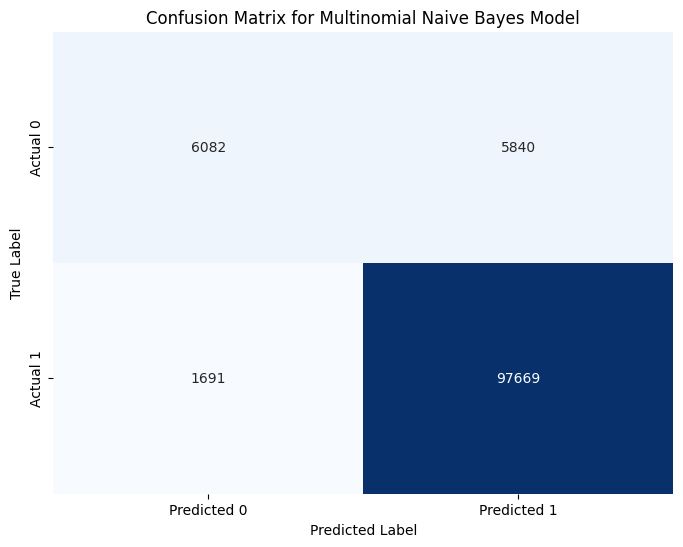

In [ ]:
cm_logistic = confusion_matrix(y_test_filtered, y_pred_logistic)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Multinomial Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [ ]:
model.fit(X_train_tfidf_filtered, y_train_filtered)

MultinomialNB()

In [ ]:
nan_indices_test = y_test.isna()
X_test_tfidf_filtered = X_test_tfidf[~nan_indices_test.values]
y_test_filtered = y_test[~nan_indices_test]

y_pred_bayes = model.predict(X_test_tfidf_filtered)

print("Accuracy:", accuracy_score(y_test_filtered, y_pred_bayes))
print("\nClassification Report:\n", classification_report(y_test_filtered, y_pred_bayes))

Accuracy: 0.8981506443090527

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.06      0.11     11922
         1.0       0.90      1.00      0.95     99360

    accuracy                           0.90    111282
   macro avg       0.87      0.53      0.53    111282
weighted avg       0.89      0.90      0.86    111282



In [ ]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test_filtered, y_pred_bayes))


Confusion Matrix:
 [[  722 11200]
 [  134 99226]]


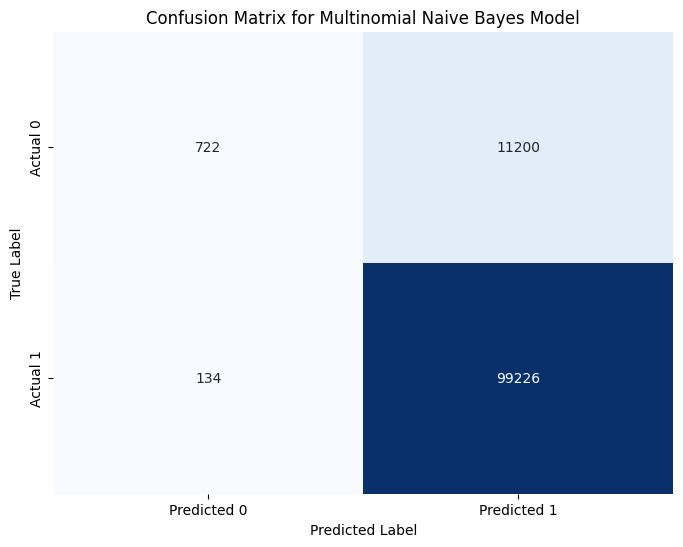

In [ ]:
cm_bayes = confusion_matrix(y_test_filtered, y_pred_bayes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_bayes, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Multinomial Naive Bayes Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

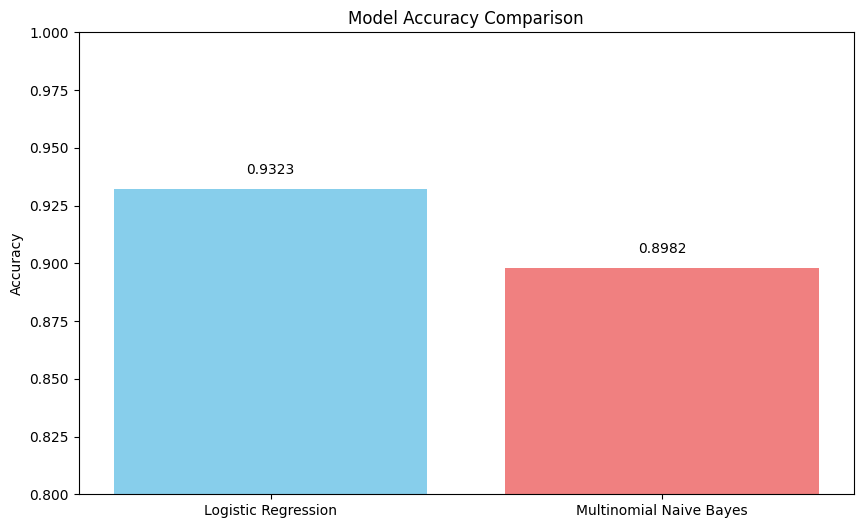

In [2]:
import matplotlib.pyplot as plt

logistic_regression_accuracy = 0.9323250840207761
naive_bayes_accuracy = 0.8981506443090527

models = ['Logistic Regression', 'Multinomial Naive Bayes']
accuracies = [logistic_regression_accuracy, naive_bayes_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral'])
plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f'{accuracy:.4f}', ha='center', va='bottom')
plt.show()